In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [36]:
xt=pd.read_csv('../LP-IV-datasets/MNIST/mnist_train.csv')
xtr=xt.drop('label',axis=1).values
ytr=xt['label'].values

In [37]:
yt=pd.read_csv('../LP-IV-datasets/MNIST/mnist_test.csv')
xts=yt.drop('label',axis=1).values
yts=yt['label'].values

In [38]:
xtr=xtr/255.0
xts=xts/255.0


xtr=xtr.reshape((-1,28*28))
xts=xts.reshape((-1,28*28))

In [39]:
print(xtr.shape)
print(xts.shape)
print(ytr.shape)
print(yts.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [40]:
ytr=keras.utils.to_categorical(ytr,10)
yts=keras.utils.to_categorical(yts,10)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD



In [42]:
model=Sequential([
    Dense(128,input_shape=(784,),activation='relu'),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

In [43]:
sgd=SGD()

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
hist=model.fit(xtr,ytr,shuffle=True,validation_data=(xts,yts),epochs=11,batch_size=32)

Epoch 1/11
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7476 - accuracy: 0.7878 - val_loss: 0.3201 - val_accuracy: 0.9127
Epoch 2/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3513 - accuracy: 0.9003 - val_loss: 0.2491 - val_accuracy: 0.9287
Epoch 3/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2852 - accuracy: 0.9180 - val_loss: 0.2153 - val_accuracy: 0.9388
Epoch 4/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2448 - accuracy: 0.9298 - val_loss: 0.1871 - val_accuracy: 0.9448
Epoch 5/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2164 - accuracy: 0.9370 - val_loss: 0.1696 - val_accuracy: 0.9503
Epoch 6/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1944 - accuracy: 0.9438 - val_loss: 0.1535 - val_accuracy: 0.9536
Epoch 7/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1785 - accuracy: 0.9479 - val_loss: 0.1435 - val_accuracy:

In [45]:
score=model.evaluate(xts,yts)
print(score[0])
print(score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1109 - accuracy: 0.9671
0.11093313246965408
0.9671000242233276


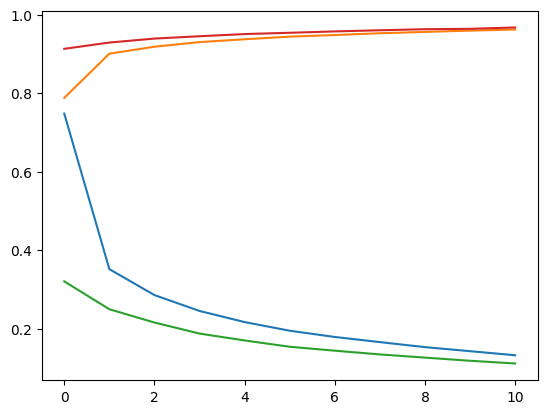

In [49]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])